In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
import scipy

In [79]:
import warnings
warnings.filterwarnings("ignore")


In [80]:

spotify_song_data= pd.read_csv("E:/project mini/song_data.csv")
spotify_song_info= pd.read_csv("E:/project mini/song_info.csv")



In [81]:
spotify_song_info.head(5)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [82]:
song_info=spotify_song_info.copy()
song_data=spotify_song_data.copy()
song_data.head(3)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [83]:
song_data.shape

(18835, 15)

In [84]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [85]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [86]:
a=song_data[song_data["popularity"]==1]
a.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [87]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [88]:
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))


In [89]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [90]:
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.max(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
y_train = y_train.reshape(1,y_train.shape[0])
x_test = x_test.T
y_test = y_test.reshape(1,y_test.shape[0])
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (13, 15068)
x_test:  (13, 3767)
y_train:  (1, 15068)
y_test:  (1, 3767)


In [91]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [92]:
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [93]:

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [94]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [95]:

def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction


Cost after iteration 0: 0.678852
Cost after iteration 10: 0.660944
Cost after iteration 20: 0.647602
Cost after iteration 30: 0.637628
Cost after iteration 40: 0.630145
Cost after iteration 50: 0.624507
Cost after iteration 60: 0.620240
Cost after iteration 70: 0.616998
Cost after iteration 80: 0.614523
Cost after iteration 90: 0.612625
Cost after iteration 100: 0.611163
Cost after iteration 110: 0.610032
Cost after iteration 120: 0.609152
Cost after iteration 130: 0.608463
Cost after iteration 140: 0.607920
Cost after iteration 150: 0.607490
Cost after iteration 160: 0.607146
Cost after iteration 170: 0.606869
Cost after iteration 180: 0.606642
Cost after iteration 190: 0.606455


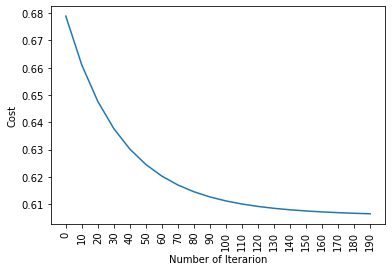

train accuracy: 70.90522962569685 %
test accuracy: 71.72816564905762 %


In [96]:

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)


x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

In [97]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

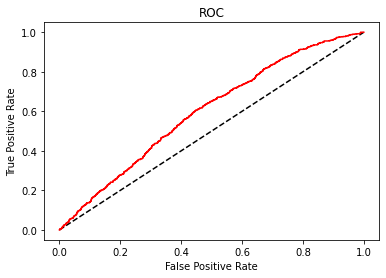

Cross_val Scores:  [0.70935634 0.70935634 0.70935634 0.70935634 0.70869277 0.70869277
 0.70869277 0.70869277 0.70916335 0.70916335]
Cross_val scores average:  0.7090523109949056


In [98]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.709052298098599


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [101]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))


With KNN (K=3) train accuracy is:  0.9940270772498009
With KNN (K=3) test accuracy is:  0.7908149721263605


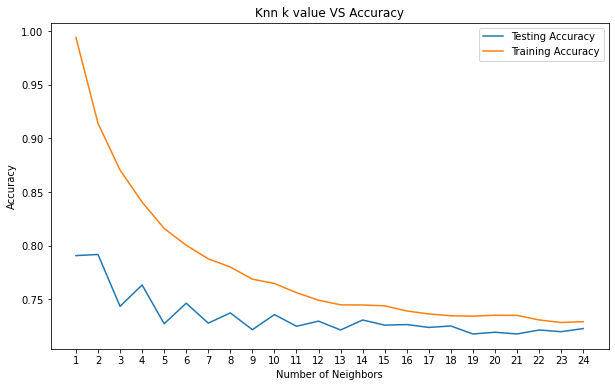

Best accuracy is 0.7918768250597292 with K = 2


In [102]:



neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))




In [103]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

Cross_val Scores:  [0.69674851 0.72196417 0.70869277 0.70338421 0.71001991 0.70338421
 0.70537492 0.71930989 0.73373174 0.71314741]
Cross_val scores average:  0.7115757716755187
Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.7757382404874683


In [104]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.7090522962569684
Test accuracy of svm algo: 0.7172816564905761


In [105]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)


SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm


Cross_val Scores:  [0.70935634 0.70935634 0.70935634 0.70935634 0.70869277 0.70869277
 0.70869277 0.70869277 0.70916335 0.70916335]
Cross_val scores average:  0.7090523109949056


In [106]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))

Naive_bayes_score=nb.score(x_test,y_test)



Train accuracy of naive bayes: 0.7090522962569684
Test accuracy of naive bayes: 0.7172816564905761


In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test


from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

CrossVal_RandomForestClassifier_score=cv_result_randomforest

Train ccuracy of random forest 0.9951552959915052
Test accuracy of random forest 0.8863817361295461
Cross_val Scores:  [0.88984738 0.8739217  0.88254811 0.86794957 0.86529529 0.86861314
 0.87193099 0.8805574  0.88446215 0.88247012]
Cross_val scores average:  0.876759584092297


In [108]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

The train accuracy for Random Forest and Logistic Regression is: 0.9925006636580833
The test accuracy for Random Forest and Logistic Regression is: 0.8919564640297318


In [109]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.87989383 0.86463172 0.86562707 0.86724195 0.87653501]
Cross_val scores average:  0.8707859175160237


In [110]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)

[22:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.06936462 0.07968939 0.07848953 0.07810301 0.14359997 0.06227228
 0.06914385 0.08172484 0.06711392 0.07122011 0.07273194 0.05349564
 0.07305095]


[22:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


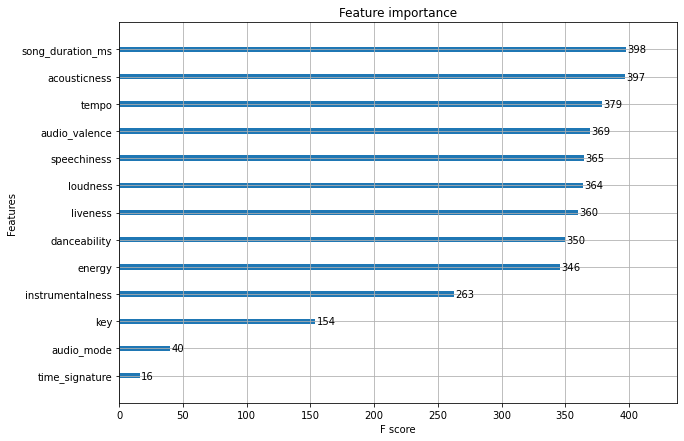

In [111]:



from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
#plot_importance(model)
pyplot.show()



In [112]:

from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_)

[22:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 82.43%


In [113]:

labels = ['RF','SVM', 'K-NN', 'LR']
accuracy = [0.897531,0.885054, 0.789488,0.710711]
validation = [0.878750, 0.875631, 0.714693, 0.710711]

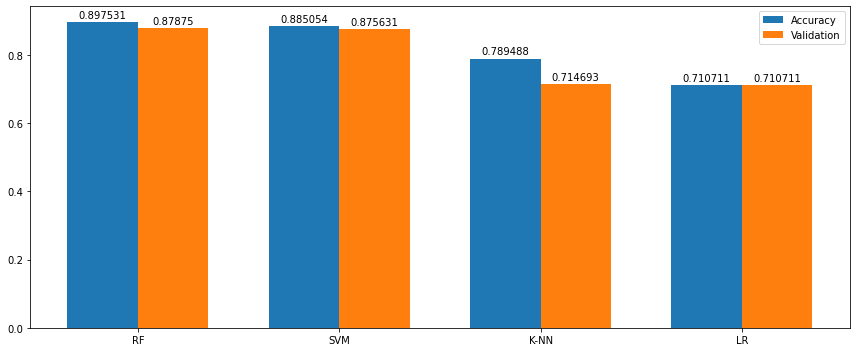

In [114]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, validation, width, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [115]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(x_train, y_train)
y_pred = classifier_forest.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm


array([[2640,   62],
       [ 369,  696]], dtype=int64)

In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [ ]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)


In [ ]:
filename = 'songspopularity.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [ ]:
y_pred = classifier_forest.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)